In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_x, data_y = fetch_openml(name="boston", version=1, as_frame=True, return_X_y=True, parser="pandas")


In [7]:
data_x.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [19]:
data_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


字段解释：

+ CRIM: 城镇人均犯罪率
+ ZN: 住宅用地所占比例
+ INDUS: 城镇中非住宅用地所占比例
+ CHAS: 虚拟变量,用于回归分析
+ NOX: 环保指数
+ RM: 每栋住宅的房间数
+ AGE: 1940 年以前建成的自住单位的比例
+ DIS: 距离 5 个波士顿的就业中心的加权距离
+ RAD: 距离高速公路的便利指数
+ TAX: 每一万美元的不动产税率
+ PTRATIO: 城镇中的教师学生比例
+ B: 城镇中的黑人比例
+ LSTAT: 地区中有多少房东属于低收入人群
+ MEDV: 自住房屋房价中位数（也就是均价）

In [10]:
data_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

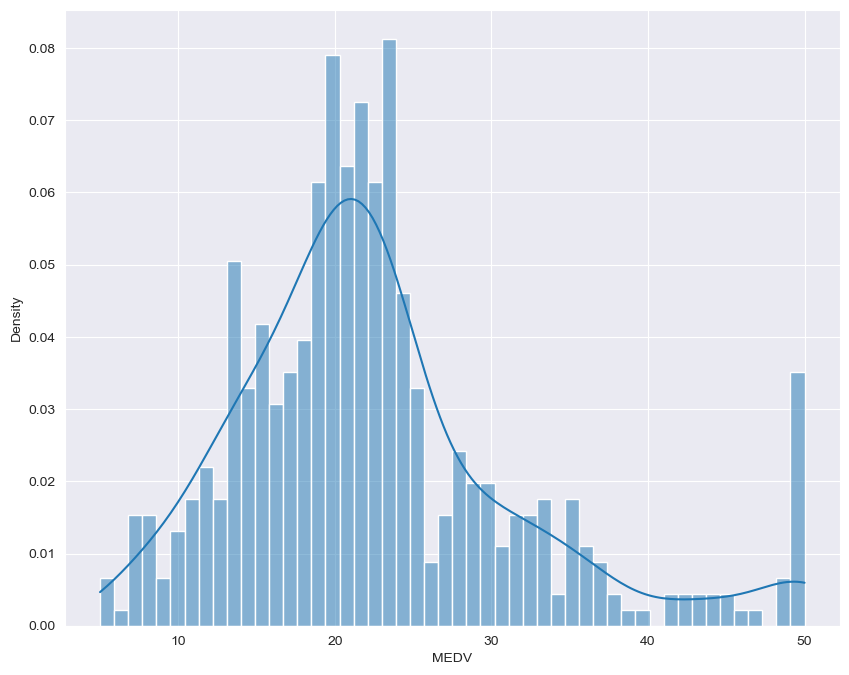

In [21]:
# 找出 y 的数据分布， 看结果主要聚集在哪个区域
boston = pd.DataFrame(data_x, columns=data_x.keys())
boston['MEDV'] = data_y
plt.figure(figsize=(10,8))
# sns.distplot(boston['MEDV'], bins=30) 
# `distplot` is a deprecated function and will be removed in seaborn v0.14.0.
# will use histplot instead

sns.histplot(boston['MEDV'], kde=True, bins=50, stat="density")
plt.show()

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


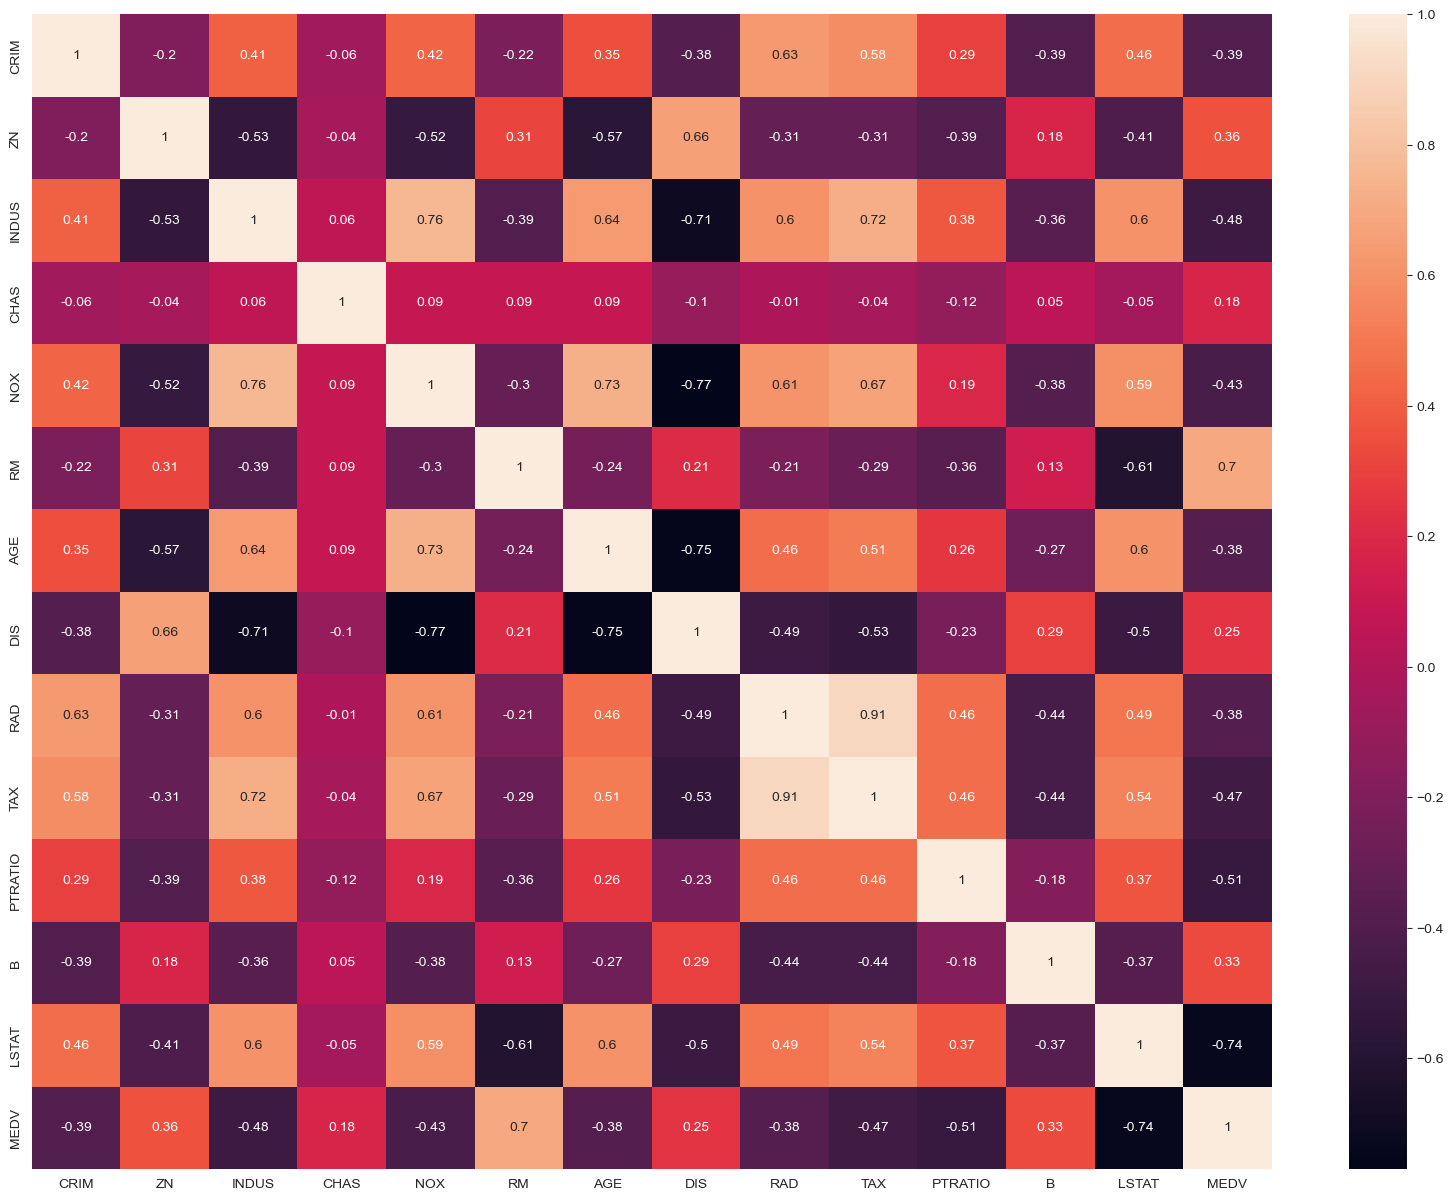

In [23]:
# 利用heatmap 查看哪两个 features 关系性最近
correlation_matrix = boston.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# 基于heatmap, 找出LSTAT 和 RM 和 MEDV 关联性最高

## 接下来我们就专注于 LSTAT 和 RM 对 MEDV 来做分析

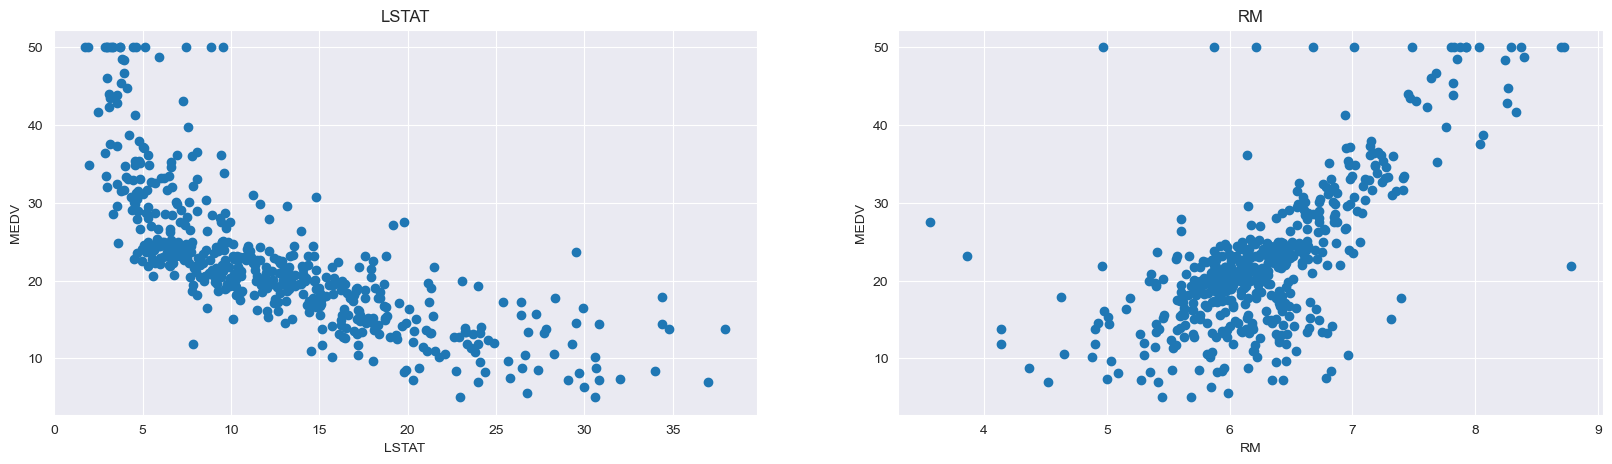

In [24]:
# 画出 LSTAT 和 RM 的图像，看是否符合线性回归的图

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### 确定LSTAT 和 RM 的确是 和  MEDV 有 线性回归的关系， 所以利用LSTAT 和 RM开始准备数据

In [26]:
X = boston[['LSTAT','RM']]
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## LinearRegression 模型

In [30]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
# 打印截距
print(lr.intercept_)
# 打印模型系数
print(lr.coef_)
y_test_predict = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)
print(rmse, r2)

2.7362403426066066
[-0.71722954  4.58938833]
5.137400784702911 0.6628996975186953
